In [8]:
from keras_facenet import FaceNet

from mtcnn.mtcnn import MTCNN

from sklearn.metrics.pairwise import cosine_similarity

from PIL import Image,ImageDraw
from PIL import ImageFilter
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os
import glob
from pathlib import Path

folder = "Faces-Lock"
try:
    Path(folder).mkdir()
except:
    print('folder already exists')

In [9]:
embedder = FaceNet()
detector = MTCNN()

In [252]:
names = [os.path.splitext(os.path.basename(i))[0] for i in glob.glob(r"C:\Users\Raum\Desktop\รูปเที่ยว\*")]
# names

In [276]:
def visual_multifaces(head_path,names):
    # head_path = "C:/Users/Raum/Desktop/jec/code/experimental/test_tourial/Faces-Lock"
    for index,i in enumerate(os.listdir(head_path)):
        files_path = os.path.join(head_path+'/'+i)
        nplots = os.listdir(files_path)
        fig = plt.figure(figsize=(8,4))
        print(f'{names[index]}')
        for j in range(len(nplots)):
            
            img = cv2.resize(cv2.imread(files_path+'/'+nplots[j]),(224,224))
            image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(4,10,j+1)
            plt.imshow(image_rgb)
            plt.title(j+1)
            plt.xticks([]);plt.yticks([])
        plt.show()

avenger


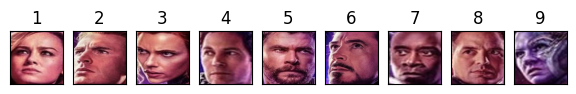

chai


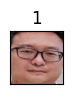

download


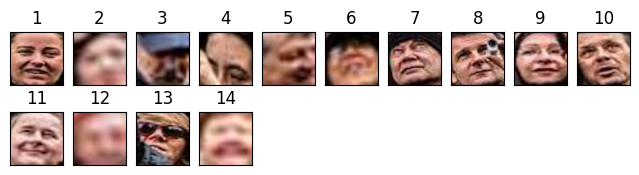

frame_199


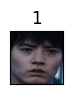

ggggg


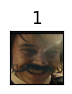

iheartoo


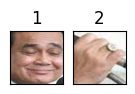

jungrai


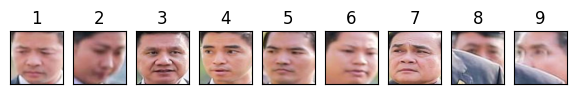

lock_f


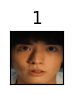

lufy


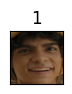

mask


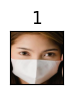

Pita


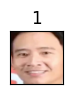

pitha


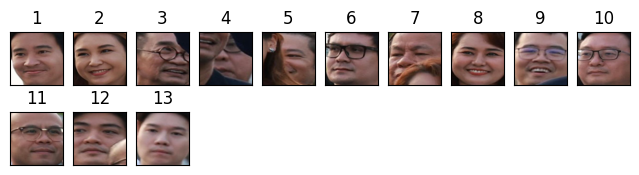

siri


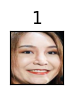

superman1


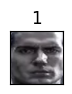

superman2


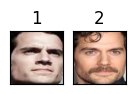

superman3


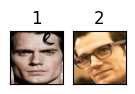

superman4


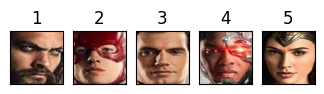

thewicher1


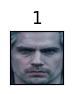

thewicher2


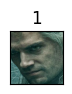

thor


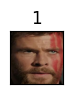

wonder


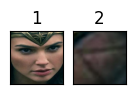

zomtest


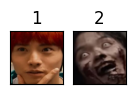

zomtest2


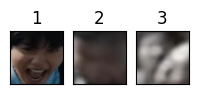

In [277]:
visual_multifaces(folder,names)

In [248]:
def detect_all(file_name): # take embeddings, and position
  names = []
  file_names = glob.glob(file_name)
  embedding_faces = []
  data_position = {}
  crop_face = {}
  images = []
  for i,image in enumerate(file_names):
    names.append(os.path.splitext(os.path.basename(image))[0])
    image = Image.open(image).convert('RGB')
    im_arr = np.array(image)
    images.append(im_arr)
    faces = detector.detect_faces(im_arr,)
    datafaces = []
    position_crop =  []
    for j in faces:
      x1,y1,width,height = j['box']
      x2,y2 = (x1+width),(y1+height)
      datafaces.append([x1,y1,x2,y2])
      position_crop.append([y1,y2,x1,x2])
    data_position[i] = datafaces
    crop_face[i] = position_crop
    datafaces = []
    position_crop = []
    
  '''for delete file in image_lock'''
  if os.listdir(folder+'/') !=[]:
    for i in os.listdir(folder+'/'): 
        folder_folder = os.path.join(folder+'/',i)
        for i in os.listdir(folder_folder+'/'):
            os.remove(os.path.join(folder_folder+'/',i))
        os.rmdir(folder_folder)

  for i,img in enumerate(images):
      new_folder = folder+"/Faces_{}".format(names[i])
      try:
          os.makedirs(new_folder)
      except:
          print('folder already exists')
      index_image = 0
      for j in crop_face[i]:
        face = img[j[0]:j[1],j[2]:j[3]]
        image_face = Image.fromarray(face)
        image_face = image_face.resize((224,224))
        faces_crops = np.array(image_face).reshape(-1,224,224,3)
        embedding_faces.append(embedder.embeddings(faces_crops))
        index_image +=1
        path = new_folder+'/Face_{}.jpg'.format(index_image) # path for collect images
        image_face.save(path)
  # visual_multifaces(folder,names)
  return embedding_faces,data_position

In [249]:
embedding_faces,position=detect_all(r"C:\Users\Raum\Desktop\รูปเที่ยว\*") # lock by self-image

In [6]:
def plot_result(file_image,embedding_faces,position,lock_face=None,file_filter=None):
  log_cosine_similarity = []
  image = Image.open(file_image).convert('RGB')
  if file_filter is None:
      draw = ImageDraw.Draw(image)
  else:
    fitter_image = Image.open(file_filter).convert('RGBA')


  Detection_check = np.zeros((len(position)))
  if lock_face : 
    '''if want to blur >=2 in images'''
    for j in range(len(lock_face)):
      for i in range(len(position)):
            similar = cosine_similarity(embedding_faces[lock_face[j]], embedding_faces[i])
            log_cosine_similarity.append(similar)
            if similar>0.9 and Detection_check[i] ==0 :
              Detection_check[i] = 1
              break


  for i in range(len(position)):
      if Detection_check[i] == 1:
        # draw.rectangle([(position[i][0],position[i][1]),(position[i][2],position[i][3])],outline=(25,255,0),width=5)
        pass
      else :
        x = int((position[i][2]-position[i][0]))
        y = int((position[i][3]-position[i][1]))
        # print(x,y)
        if file_filter is None:
          censor_region = (position[i][0],position[i][1], position[i][2],position[i][3])  # Format: (left, top, right, bottom)
          censored_area = image.crop(censor_region)
          
          censored_width, censored_height = censored_area.size
          censored_area = censored_area.resize(
              (6, 6),
              Image.NEAREST
          ).resize(
              (censored_width, censored_height),
              Image.NEAREST
          )
          image.paste(censored_area, censor_region)

        else:
          fitter_face = fitter_image.resize((x,y))
          image.paste(fitter_face,(position[i][0], position[i][1]),fitter_face) # gan:X, gan:Y
      
        
  return image,log_cosine_similarity

def plot_box(file_image,position):
  image = Image.open(file_image).convert('RGB')
  draw = ImageDraw.Draw(image)
  for i in range(len(position)):
    draw.rectangle([(position[i][0],position[i][1]),(position[i][2],position[i][3])],outline=(255,0,0),width=5)
  image.show()

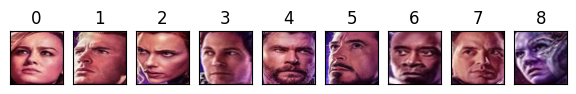

In [7]:
f = r'C:\Users\Raum\Desktop\jec\code\dataface\avenger.jpg'
m = r'C:\Users\Raum\Desktop\jec\code\dataface\dogmeme.png'
embedding_faces,position=extraction_keras_all(f) # lock by self-image

img,va = plot_result(f,embedding_faces,position,lock_face=[0,8,4],file_filter=m)
# img,va = plot_result(f,[0,8,4],embedding_faces,position,m)